# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
df = pd.read_csv("/content/data_clustering.csv")

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Target
0,2,1,36,0,1,0,1,0.0,1,2
1,0,1,15,0,1,0,0,0.0,0,1
2,1,1,23,2,2,3,1,0.0,2,0
3,1,1,33,2,2,3,1,0.0,0,2
4,2,1,28,0,2,3,0,0.0,2,0


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [ ]:
# Buatlah model klasifikasi menggunakan Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy: 1.0


In [ ]:
# Menyimpan Model
joblib.dump(model, '../results/decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [ ]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.

# Evaluate Decision Tree
y_pred_dt = model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Evaluation:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print("-" * 20)

# Evaluate Random Forest
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

Decision Tree Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
--------------------
Random Forest Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [ ]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
joblib.dump(rf, '../results/explore_random_forest_classification.h5')

['explore_random_forest_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [ ]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Lakukan dalam satu cell ini saja.

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

tuned_rf = RandomForestClassifier(**best_params)
tuned_rf.fit(X_train, y_train)

y_pred_tuned_rf = tuned_rf.predict(X_test)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 1.0000


In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
precision_tuned_rf = precision_score(y_test, y_pred_tuned_rf, average='weighted')
recall_tuned_rf = recall_score(y_test, y_pred_tuned_rf, average='weighted')
f1_tuned_rf = f1_score(y_test, y_pred_tuned_rf, average='weighted')

print("Tuned Random Forest Evaluation:")
print(f"Accuracy: {accuracy_tuned_rf:.4f}")
print(f"Precision: {precision_tuned_rf:.4f}")
print(f"Recall: {recall_tuned_rf:.4f}")
print(f"F1-Score: {f1_tuned_rf:.4f}")

Tuned Random Forest Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [ ]:
# Menyimpan Model hasil tuning
# import joblib
joblib.dump(tuned_rf, '../results/tuning_classification.h5')

['tuning_classification.h5']

End of Code

# **Latihan Pipeline**

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("/content/data_clustering_inverse.csv")

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionAmount.1,TransactionType.1,Location.1,Channel.1,CustomerAge.1,CustomerOccupation.1,TransactionDuration.1,LoginAttempts.1,AccountBalance.1,Target
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,0.007207,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2.0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,0.195940,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,1.0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,0.065680,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,0.0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,0.096016,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2.0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,0.047888,Debit,Oklahoma City,ATM,0.000000,Student,0.558621,0.0,0.045738,0.0


In [3]:
df.dropna(subset=['Target'], inplace = True)

In [4]:
X = df.drop(columns=['Target'])
y = df['Target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
    )

In [6]:
# cek kategorical cols
col_categorical = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]

# cek numerical cols
col_numerical = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

In [7]:
my_cols = col_categorical + col_numerical
X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()

X_train.head()

,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,...,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount.1,CustomerAge.1,TransactionDuration.1,LoginAttempts.1,AccountBalance.1
2120,TX002121,AC00002,2023-01-10 16:00:32,Debit,San Diego,D000594,113.137.153.101,M022,Online,Student,...,476.99,23.0,187.0,1.0,1154.48,0.030044,0.645161,0.300000,0.0,0.237943
2101,TX002102,AC00374,2023-03-13 18:45:47,Debit,Tucson,D000105,21.97.154.92,NaN,Online,Student,...,51.20,18.0,83.0,1.0,730.60,0.235266,0.177419,0.320690,0.0,0.597807
450,TX000451,AC00495,2023-08-03 17:42:02,Debit,Fort Worth,D000031,30.92.249.132,M075,Online,Student,...,745.03,28.0,231.0,1.0,160.57,0.220366,0.677419,0.127586,0.0,0.020941
316,TX000317,AC00200,2023-10-12 16:02:13,Debit,Houston,D000177,23.92.205.75,M065,ATM,Engineer,...,12.23,42.0,139.0,1.0,7844.88,0.065951,0.129032,0.965517,0.0,0.358058
1338,TX001339,AC00110,2023-11-17 16:39:20,Debit,Colorado Springs,D000294,201.95.180.152,M062,ATM,Doctor,...,19.39,43.0,45.0,1.0,9847.60,0.222805,0.000000,0.617241,0.0,0.092656


In [8]:
# Processing steps

num_tranformer = SimpleImputer(strategy='mean')

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encod', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_tranformer, col_numerical),
        ('cat', cat_transformer, col_categorical)
    ]
)

In [9]:
# Define model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
# Pipeline and evaluation

my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [11]:
my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_test)

In [20]:
# Evaluation model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, preds)

print(f"Accuracy score: {accuracy}")

Accuracy score: 0.3524229074889868


              precision    recall  f1-score   support

         0.0       0.36      0.47      0.41       165
         1.0       0.35      0.45      0.39       171
         2.0       0.27      0.05      0.09       118

    accuracy                           0.35       454
   macro avg       0.33      0.32      0.30       454
weighted avg       0.33      0.35      0.32       454



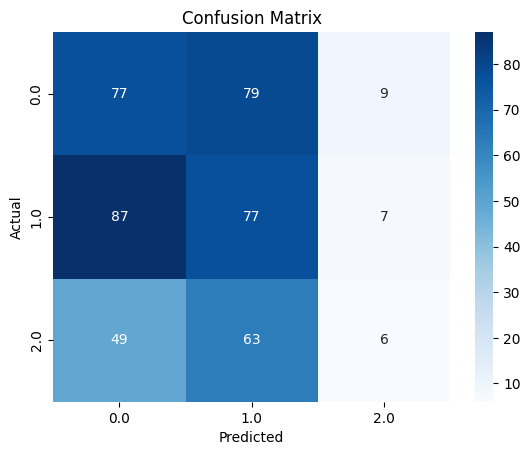

In [18]:
# confusioin matrix and classification report

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, preds)

sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    xticklabels=my_pipeline.classes_,
    yticklabels=my_pipeline.classes_,
    cmap='Blues'
)

plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.show

print(classification_report(y_test, preds))